# Import libraries

In [2]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.6 MB/s 
     |████████████████████████████████| 596 kB 36.2 MB/s 
     |████████████████████████████████| 101 kB 10.4 MB/s 
     |████████████████████████████████| 6.6 MB 39.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import os

from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import torch

os.environ["WANDB_API_KEY"] = "0"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# if device.type == 'cuda':
#   path = '/content/drive/MyDrive/deep_learning_project/'
# else:
#   path = '/content/drive/MyDrive/deep_learning_project/'
#   # path = 'contradictory-my-dear-watson/'


In [5]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
    print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.117.85.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.117.85.34:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [6]:
df_train = pd.read_csv("/content/drive/MyDrive/deep_learning_project/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/deep_learning_project/test.csv")

In [8]:
df_train.head(10)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
5,ed7d6a1e62,"Bir çiftlikte birisinin, ağıla kapatılmış bu ö...",Çiftlikte insanlar farklı terimler kullanırlar.,tr,Turkish,0
6,5a0f4908a0,ریاست ہائے متحدہ امریکہ واپس آنے پر، ہج ایف بی...,ہیگ کی تفتیش ایف بی آئی اہلکاروں کی طرف سے کی...,ur,Urdu,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
9,8c10229663,Через каждые сто градусов пятна краски меняют ...,Краска изменяется в соответствии с цветом.,ru,Russian,0


In [9]:
df_test.head(10)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
5,aa2510d454,His family had lost a son and a daughter now.,The son and daughter had lost their father.,en,English
6,865d1c7b16,Steps are initiated to allow program board mem...,There's enough room for 35-40 positions on the...,en,English
7,a16f7ed56b,C'était probablement la première chose dont je...,C'était l'un de mes premiers souvenirs.,fr,French
8,6d9fa191e6,"agencies' operating trust, enterprise and inte...",Agencies in financial trouble are usually audi...,en,English
9,c156e8fed5,Hakuna aliyejua walipokwenda.,Mafiko yao ilikuwa ni siri,sw,Swahili


In [10]:
df_train.shape, df_test.shape

((12120, 6), (5195, 5))

- **Premise** - a previous statement or proposition from which another is inferred or follows as a conclusion.
- **Hypothesis** - a supposition or proposed explanation made on the basis of limited evidence as a starting point for further investigation.

In [11]:
df_train["premise"].values[0], df_train["hypothesis"].values[0]

('and these comments were considered in formulating the interim rules.',
 'The rules developed in the interim were put together with these comments in mind.')

# EDA


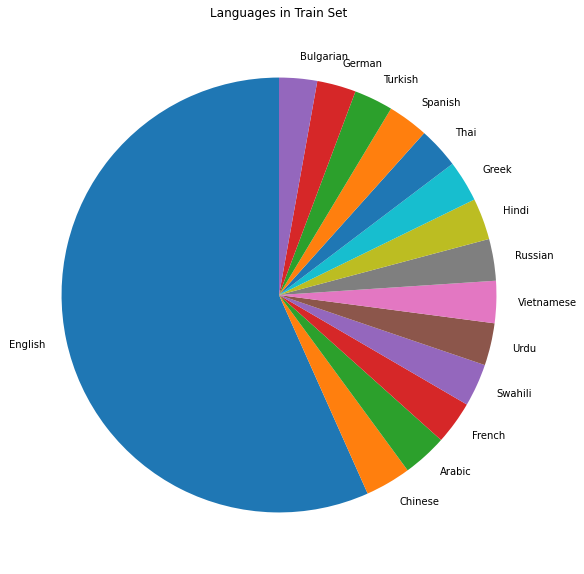

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

count_classes = df_train['language'].value_counts()
plt.pie(count_classes, 
        labels = count_classes.index, 
        startangle=90)
plt.title("Languages in Train Set")
plt.show()

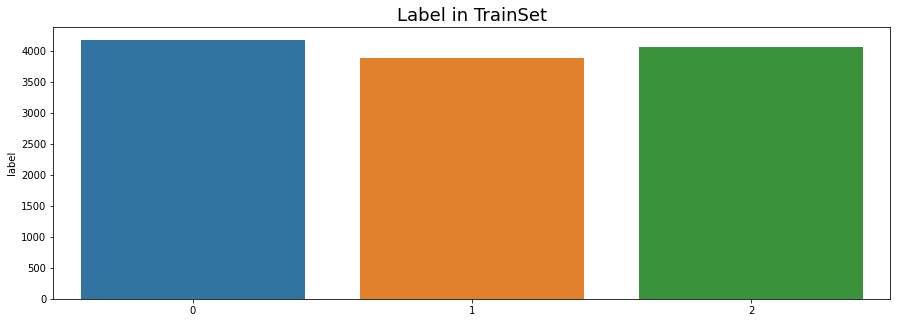

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
classes = df_train['label'].value_counts()
ax = sns.barplot(x=classes.index, y=count_classes, ax=axes)
ax.set_title('Label in TrainSet', fontsize=18)
plt.show()

# Implement Pretrained models
Use a pretrained model, a multilingual BERT model from huggingface. 

Tokenizers turn sequences of words into arrays of numbers. 

In [33]:
model_name = 'bert-base-multilingual-cased' 
tokenizer = BertTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [34]:
len(tokenizer.vocab)

119547

## 4.2 BERT
Three kind of input data - input word IDs, input masks, and input type IDs. These allow the model to know that **the premise and hypothesis are distinct sentences**, and also to ignore any padding from the tokenizer.

### Encode all of our premise/hypothesis pairs for input into BERT
- add [CLS] token to denote **the beginning of the inputs**
- add [SEP] token to denote the separation between **the premise and the hypothesis**. 
- pad all of the inputs to be the same size.

Input is expected to start with a [CLS] "This is a classification problem" token, and each sentence should end with a [SEP] "Separator" token.

In [41]:
def add_token(s):
    tokens = list(tokenizer.tokenize(s)) # with tokenize
    tokens.append('[SEP]')
    return tokenizer.convert_tokens_to_ids(tokens)
add_token("you know they can't really defend themselves")

[13028, 21852, 10689, 10944, 112, 188, 30181, 60041, 20182, 102]

In [46]:
#Pad all of the inputs to be the same size and add token
def bert_encode(hypotheses, premises, tokenizer):
    num_examples = len(hypotheses)
    hypo = tf.ragged.constant([add_token(s) for s in np.array(hypotheses)])
    print("hypotheses.shape: ", hypo.shape)
    prem = tf.ragged.constant([add_token(s) for s in np.array(premises)])
    print("premises.shape: ", prem.shape)
    cls_ = [tokenizer.convert_tokens_to_ids(['[CLS]'])] * hypo.shape[0]
    input_word_ids = tf.concat([cls_, hypo, prem], axis=-1)
    print("input_word_ids.shape: ", input_word_ids.shape)
    input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(input_word_ids.shape[0], 320)) 
    print("input_mask.shape: ", input_mask.shape)
    
    type_cls = tf.zeros_like(cls_)
    type_s1 = tf.zeros_like(hypo)
    type_s2 = tf.ones_like(prem)
    
    input_type_ids = tf.concat([type_cls, type_s1, type_s2], axis=-1).to_tensor(shape=(input_word_ids.shape[0], 320))
    
    inputs = {'input_word_ids': input_word_ids.to_tensor(shape=(input_word_ids.shape[0], 320)),
              'input_mask': input_mask,
              'input_type_ids': input_type_ids}
    print()
    
    return inputs
    

In [47]:
# encode data
train_input = bert_encode(df_train["premise"].values, df_train["hypothesis"].values, tokenizer)
test_input = bert_encode(df_test["premise"].values, df_test["hypothesis"].values, tokenizer)

hypotheses.shape:  (12120, None)
premises.shape:  (12120, None)
input_word_ids.shape:  (12120, None)
input_mask.shape:  (12120, 320)

hypotheses.shape:  (5195, None)
premises.shape:  (5195, None)
input_word_ids.shape:  (5195, None)
input_mask.shape:  (5195, 320)



In [48]:
train_input

{'input_mask': <tf.Tensor: shape=(12120, 320), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(12120, 320), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(12120, 320), dtype=int32, numpy=
 array([[  101, 10111, 11762, ...,     0,     0,     0],
        [  101, 13252, 10301, ...,     0,     0,     0],
        [  101, 13810, 32181, ...,     0,     0,     0],
        ...,
        [  101, 10117, 12452, ...,     0,     0,     0],
        [  101, 11699, 10105, ...,     0,     0,     0],
        [  101, 11399, 14764, ...,     

In [49]:
test_input

{'input_mask': <tf.Tensor: shape=(5195, 320), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(5195, 320), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(5195, 320), dtype=int32, numpy=
 array([[  101,   764, 28744, ...,     0,     0,     0],
        [  101, 13498, 11917, ...,     0,     0,     0],
        [  101, 10131, 24552, ...,     0,     0,     0],
        ...,
        [  101,  3239,  5755, ...,     0,     0,     0],
        [  101, 98370,   112, ...,     0,     0,     0],
        [  101, 10167, 15078, ...,     0, 

# Train Neural Network Model (Using Keras)

In [51]:
max_len = train_input["input_word_ids"].shape[1]
model_name = 'bert-base-multilingual-cased' 
bert_encoder = TFBertModel.from_pretrained(model_name)
#input
word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="word_ids")
mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="mask")
type_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="type_ids")

embedding = bert_encoder([word_ids, mask, type_ids])[0]
output = tf.keras.layers.Dense(3, activation='softmax')(embedding[:,0,:])

model = tf.keras.Model(inputs=[input_word_ids, mask, type_ids], outputs=output)
model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` inst

In [53]:
model_history = model.fit(train_input, 
                          df_train["label"].values, 
                          epochs = 2, 
                          verbose = 1,
                          batch_size = 128, 
                          validation_split = 0.2)

Epoch 1/2


76/76 [==============================] - 2953s 39s/step - loss: 1.0153 - accuracy: 0.4774 - val_loss: 0.8787 - val_accuracy: 0.5998
Epoch 2/2
76/76 [==============================] - 2926s 39s/step - loss: 0.8078 - accuracy: 0.6447 - val_loss: 0.8226 - val_accuracy: 0.6374


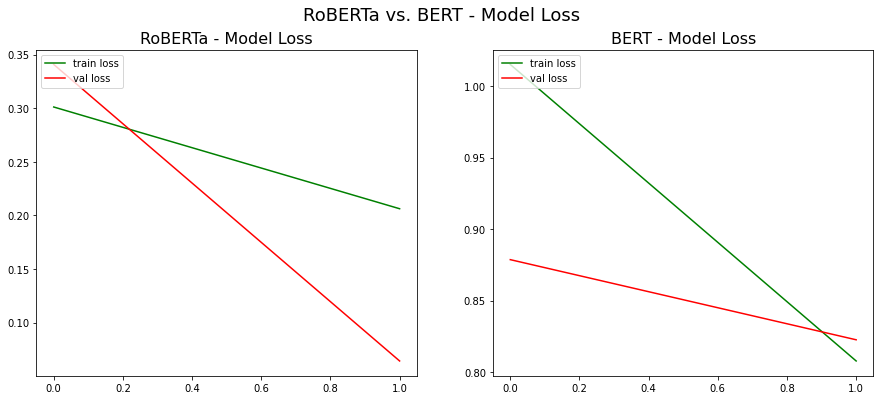

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
fig.suptitle('RoBERTa vs. BERT - Model Loss', fontsize=18)

axes[0].plot([584.2621483588591/1940, 400.04079199407715/1940], label='train loss', color='g', axes=axes[0])
axes[0].plot([0.3408783759197172, 0.06408783759197172], label='val loss', color='r', axes=axes[0])
axes[0].set_title("RoBERTa - Model Loss", fontsize=16) 
axes[0].legend(loc='upper left')

axes[1].plot(model_history.history['loss'], label='train loss', color='g', axes=axes[1])
axes[1].plot(model_history.history['val_loss'], label='val loss', color='r', axes=axes[1])
axes[1].set_title("BERT - Model Loss", fontsize=16) 
axes[1].legend(loc='upper left')

plt.show()

In [57]:
model_history.history

{'accuracy': [0.4774133563041687, 0.6446988582611084],
 'loss': [1.0152528285980225, 0.8078160285949707],
 'val_accuracy': [0.5998349785804749, 0.6373762488365173],
 'val_loss': [0.8787031173706055, 0.8226389288902283]}

# Test Neural Network

In [ ]:
y_prob = model.predict(test_input)
y_hat = y_prob.argmax(axis=-1)

submission = df_test.id.copy().to_frame()
submission['prediction'] = y_hat
submission.head() 

reference; https://www.kaggle.com/code/as411011/contradictory-my-dear-watson-nlp-tensorflow